# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
from requests.exceptions import HTTPError


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [22]:
#test np.random for lat and long
lat1 = np.random.uniform(low = 0.000, high = 90, size = 10 )
print(lat1)
long1 = np.random.uniform(low = 0.000, high = 180.000, size = 10)
print(long1)

[82.394942   62.41398168 65.2135605  31.11987426 35.29610873 78.08784361
 63.9688874  38.1792441   2.2721423   5.16355081]
[ 21.13768455 133.20466341   6.29172347  95.7101094    6.80638074
  85.34796881 129.99468085  16.03551052 127.48356281  73.42339337]


In [43]:
#testing the zip of the two variables, convert to a list to print
#lat_long1 = []
lat_long1 = list(zip(lat1, long1))
lat_long1

[(82.3949419981079, 21.137684548679484),
 (62.41398168222778, 133.20466340580398),
 (65.21356050095376, 6.291723466032968),
 (31.11987425644289, 95.71010939651634),
 (35.29610872587574, 6.806380740936781),
 (78.08784360935378, 85.3479688074465),
 (63.96888739738337, 129.99468085476425),
 (38.17924409855895, 16.035510518376686),
 (2.272142296340647, 127.48356281362751),
 (5.163550814130058, 73.4233933655388)]

In [48]:
#test code to learn more about citipy, could not find more reference material for other calls you can make beside nearest city, name
cities1 = []
for x in lat_long1:
    city = citipy.nearest_city(x[0],x[1]).city_name
    if city not in cities1:
        cities1.append(city)
        


In [51]:
#print(cities1)

In [55]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [56]:
print(cities)

['attawapiskat', 'saint george', 'rikitea', 'puerto ayora', 'faanui', 'castro', 'mar del plata', 'aktash', 'punta arenas', 'ushuaia', 'srandakan', 'santa isabel do rio negro', 'nikolskoye', 'dayal bagh', 'kangaba', 'dingle', 'bull savanna', 'kaitangata', 'cape town', 'sinnamary', 'edeia', 'san cristobal', 'atuona', 'albany', 'rocha', 'cherskiy', 'mocambique', 'mataura', 'tasiilaq', 'kamenka', 'bredasdorp', 'vaini', 'praxedis guerrero', 'barrow', 'saskylakh', 'obo', 'kocser', 'busselton', 'hohhot', 'mahebourg', 'comodoro rivadavia', 'camacha', 'hithadhoo', 'kapaa', 'tuktoyaktuk', 'chandur', 'jieshi', 'olinda', 'barentsburg', 'moundsville', 'esperance', 'illoqqortoormiut', 'the pas', 'muzhi', 'taolanaro', 'hobart', 'codrington', 'bluff', 'airai', 'cidreira', 'port elizabeth', 'constitucion', 'xining', 'komsomolskiy', 'qaanaaq', 'chernyshevskiy', 'port alfred', 'cabo san lucas', 'provideniya', 'ustye', 'batagay', 'rungata', 'saint-philippe', 'ponta do sol', 'upernavik', 'cap malheureux', 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [68]:
# Create a settings object with your API key and preferred units
settings = {"units": "imperial", "appid": api_key}

In [80]:
#method one without using the openweathermapy wrapper
#create empty lists
weather_data1 = []
temperature = []
humidity = []
cloudiness = []
windspeed = []
lat = []
long = []
city_name = []

#create a record1 counter
#create variables for the units of measurement(fahrenheit = imperial)
#create variable for units

record1 = 0
units = "imperial"

url = 'http://api.openweathermap.org/data/2.5/weather?q='

#run a loop for all the cities in our list. 
#append the new data to our empty lists listed above
for city in cities:
    city_weather = requests.get(url+city+"&appid="+api_key+"&units="+units).json()
    
    if city_weather["cod"] == 200:
        weather_data1.append(city_weather)
        temperature.append(city_weather["main"]["temp"])
        humidity.append(city_weather["main"]["humidity"])
        cloudiness.append(city_weather["clouds"]["all"])
        windspeed.append(city_weather["wind"]["speed"])
        lat.append(city_weather["coord"]["lat"])
        long.append(city_weather["coord"]["lon"])
        city_name.append(city)
        record1 += 1
        print(f'Processing Record {record1} of Set 1 | {city}')
    else:
        print(f'City was not found! Skipping.')
#print out once the for loop is complete        
print("Data download complete.")

City was not found! Skipping.
Processing Record 1 of Set 1 | saint george
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | faanui
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | mar del plata
City was not found! Skipping.
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | srandakan
Processing Record 10 of Set 1 | santa isabel do rio negro
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | dayal bagh
Processing Record 13 of Set 1 | kangaba
Processing Record 14 of Set 1 | dingle
Processing Record 15 of Set 1 | bull savanna
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | sinnamary
Processing Record 19 of Set 1 | edeia
Processing Record 20 of Set 1 | san cristobal
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | albany
Processing 

Processing Record 180 of Set 1 | gazimurskiy zavod
Processing Record 181 of Set 1 | ziro
Processing Record 182 of Set 1 | mount isa
Processing Record 183 of Set 1 | tual
Processing Record 184 of Set 1 | hofn
City was not found! Skipping.
City was not found! Skipping.
Processing Record 185 of Set 1 | swan hill
Processing Record 186 of Set 1 | bend
Processing Record 187 of Set 1 | merauke
Processing Record 188 of Set 1 | pevek
Processing Record 189 of Set 1 | henties bay
Processing Record 190 of Set 1 | shu
Processing Record 191 of Set 1 | alagoa grande
Processing Record 192 of Set 1 | yulara
Processing Record 193 of Set 1 | fort washington
City was not found! Skipping.
City was not found! Skipping.
City was not found! Skipping.
Processing Record 194 of Set 1 | ambon
Processing Record 195 of Set 1 | valdivia
Processing Record 196 of Set 1 | wanaka
Processing Record 197 of Set 1 | kankakee
Processing Record 198 of Set 1 | aguimes
Processing Record 199 of Set 1 | trapani
Processing Record 

Processing Record 365 of Set 1 | isiro
Processing Record 366 of Set 1 | yantal
Processing Record 367 of Set 1 | manta
Processing Record 368 of Set 1 | fortuna
Processing Record 369 of Set 1 | kuloy
Processing Record 370 of Set 1 | lethem
Processing Record 371 of Set 1 | panevezys
Processing Record 372 of Set 1 | ginda
Processing Record 373 of Set 1 | matamoros
Processing Record 374 of Set 1 | cockburn town
Processing Record 375 of Set 1 | sorland
Processing Record 376 of Set 1 | dwarka
Processing Record 377 of Set 1 | grand gaube
Processing Record 378 of Set 1 | vrises
Processing Record 379 of Set 1 | san patricio
Processing Record 380 of Set 1 | hluti
City was not found! Skipping.
Processing Record 381 of Set 1 | dancalan
City was not found! Skipping.
Processing Record 382 of Set 1 | shaunavon
Processing Record 383 of Set 1 | belomorsk
Processing Record 384 of Set 1 | kavieng
Processing Record 385 of Set 1 | tezu
Processing Record 386 of Set 1 | rodeo
Processing Record 387 of Set 1 | 

City was not found! Skipping.
Processing Record 543 of Set 1 | zafarabad
City was not found! Skipping.
Data downloard complete.


In [84]:
#test out the list of weather data that was appended
weather_data1

[{'coord': {'lon': 22.34, 'lat': 39.45},
  'weather': [{'id': 801,
    'main': 'Clouds',
    'description': 'few clouds',
    'icon': '02n'}],
  'base': 'stations',
  'main': {'temp': 44.6,
   'pressure': 1029,
   'humidity': 81,
   'temp_min': 44.6,
   'temp_max': 44.6},
  'visibility': 10000,
  'wind': {'speed': 4.97, 'deg': 72.0027},
  'clouds': {'all': 20},
  'dt': 1553205000,
  'sys': {'type': 1,
   'id': 6629,
   'message': 0.0035,
   'country': 'GR',
   'sunrise': 1553229101,
   'sunset': 1553273013},
  'id': 262462,
  'name': 'Saint George',
  'cod': 200},
 {'coord': {'lon': -134.97, 'lat': -23.12},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01d'}],
  'base': 'stations',
  'main': {'temp': 79.34,
   'pressure': 1015.13,
   'humidity': 98,
   'temp_min': 79.34,
   'temp_max': 79.34,
   'sea_level': 1015.13,
   'grnd_level': 1015.12},
  'wind': {'speed': 19.06, 'deg': 95.0027},
  'clouds': {'all': 0},
  'dt': 1553208719,
  'sys': {

In [94]:
#usint the openweathermapy.core wrapper
weather_data = []
record = 0
summary = ["sys.country","main.temp","main.humidity","clouds.all","wind.speed","coord.lat","coord.lon"]
city_list = []

for city in cities:
    try:
        city_weather = owm.get_current(city, **settings)
        data = city_weather(*summary)
        weather_data.append(data)
        city_list.append(city)
        record += 1 
        print(f'Processing Record {record} of Set 1 | {city}')
    except Exception as e:
        print(f'The city of {city} was not found! Skipping.')
        continue
print(f'The OpenWeather API data dump is complete.')        

The city of attawapiskat was not found! Skipping.
Processing Record 1 of Set 1 | saint george
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | faanui
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | mar del plata
The city of aktash was not found! Skipping.
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | srandakan
Processing Record 10 of Set 1 | santa isabel do rio negro
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | dayal bagh
Processing Record 13 of Set 1 | kangaba
Processing Record 14 of Set 1 | dingle
Processing Record 15 of Set 1 | bull savanna
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | sinnamary
Processing Record 19 of Set 1 | edeia
Processing Record 20 of Set 1 | san cristobal
Processing Record 21 of Set 1 | atuona
Processing Recor

Processing Record 171 of Set 1 | yerbogachen
Processing Record 172 of Set 1 | sao joao dos patos
Processing Record 173 of Set 1 | tautira
Processing Record 174 of Set 1 | sambava
Processing Record 175 of Set 1 | ushtobe
Processing Record 176 of Set 1 | bilibino
Processing Record 177 of Set 1 | plettenberg bay
Processing Record 178 of Set 1 | abu kamal
Processing Record 179 of Set 1 | praia da vitoria
Processing Record 180 of Set 1 | gazimurskiy zavod
Processing Record 181 of Set 1 | ziro
Processing Record 182 of Set 1 | mount isa
Processing Record 183 of Set 1 | tual
Processing Record 184 of Set 1 | hofn
The city of anar darreh was not found! Skipping.
The city of amderma was not found! Skipping.
Processing Record 185 of Set 1 | swan hill
Processing Record 186 of Set 1 | bend
Processing Record 187 of Set 1 | merauke
Processing Record 188 of Set 1 | pevek
Processing Record 189 of Set 1 | henties bay
Processing Record 190 of Set 1 | shu
Processing Record 191 of Set 1 | alagoa grande
Proc

Processing Record 351 of Set 1 | tahe
Processing Record 352 of Set 1 | puerto baquerizo moreno
Processing Record 353 of Set 1 | great yarmouth
Processing Record 354 of Set 1 | maceio
Processing Record 355 of Set 1 | bowen
Processing Record 356 of Set 1 | amuntai
Processing Record 357 of Set 1 | tulsipur
Processing Record 358 of Set 1 | lensk
Processing Record 359 of Set 1 | baykit
Processing Record 360 of Set 1 | san ramon
Processing Record 361 of Set 1 | corinto
Processing Record 362 of Set 1 | krasnovishersk
Processing Record 363 of Set 1 | copalillo
Processing Record 364 of Set 1 | kununurra
Processing Record 365 of Set 1 | isiro
Processing Record 366 of Set 1 | yantal
Processing Record 367 of Set 1 | manta
Processing Record 368 of Set 1 | fortuna
Processing Record 369 of Set 1 | kuloy
Processing Record 370 of Set 1 | lethem
Processing Record 371 of Set 1 | panevezys
Processing Record 372 of Set 1 | ginda
Processing Record 373 of Set 1 | matamoros
Processing Record 374 of Set 1 | co

Processing Record 522 of Set 1 | ust-ilimsk
Processing Record 523 of Set 1 | fukue
Processing Record 524 of Set 1 | coahuayana
Processing Record 525 of Set 1 | zhigansk
Processing Record 526 of Set 1 | vilyuysk
The city of loutra ipatis was not found! Skipping.
Processing Record 527 of Set 1 | inirida
Processing Record 528 of Set 1 | mackay
Processing Record 529 of Set 1 | ust-tarka
Processing Record 530 of Set 1 | libreville
Processing Record 531 of Set 1 | harer
Processing Record 532 of Set 1 | samarai
Processing Record 533 of Set 1 | hami
The city of olafsvik was not found! Skipping.
Processing Record 534 of Set 1 | dalby
Processing Record 535 of Set 1 | margate
Processing Record 536 of Set 1 | meridian
Processing Record 537 of Set 1 | sao felix do xingu
Processing Record 538 of Set 1 | chumikan
The city of acarau was not found! Skipping.
Processing Record 539 of Set 1 | kholodnyy
Processing Record 540 of Set 1 | almeirim
Processing Record 541 of Set 1 | okha
Processing Record 542 o

In [96]:
print(weather_data)

[('GR', 45.81, 93, 20, 2.24, 39.45, 22.34), ('PF', 79.31, 98, 0, 18.81, -23.12, -134.97), ('EC', 78.01, 92, 0, 4, -0.74, -90.35), ('PF', 84.71, 100, 88, 6.62, -16.48, -151.75), ('CL', 53.6, 100, 90, 4.7, -42.48, -73.76), ('AR', 52.67, 63, 36, 7.4, -46.43, -67.52), ('CL', 48.09, 87, 75, 9.17, -53.16, -70.91), ('AR', 44.6, 87, 75, 9.17, -54.81, -68.31), ('ID', 82.73, 96, 56, 4.5, -7.94, 110.25), ('BR', 76.7, 93, 36, 3.6, -0.41, -65.02), ('RU', 33.85, 69, 0, 24.61, 59.7, 30.79), ('IN', 66.2, 77, 5, 3.36, 27.22, 78.02), ('ML', 73.28, 85, 100, 12.21, 11.94, -8.41), ('PH', 88.4, 47, 0, 10.98, 11, 122.67), ('JM', 73.64, 77, 76, 2.37, 17.89, -77.59), ('NZ', 68.87, 83, 44, 5.95, -46.28, 169.85), ('ZA', 63.82, 63, 0, 20.8, -33.93, 18.42), ('GF', 79.13, 98, 56, 8.97, 5.38, -52.96), ('BR', 73.55, 88, 44, 7.74, -17.34, -49.93), ('EC', 53.64, 93, 75, 5.82, -0.39, -78.55), ('PF', 82.19, 100, 12, 14.9, -9.8, -139.03), ('US', 36.7, 69, 90, 9.17, 42.65, -73.75), ('UY', 49.07, 88, 0, 2.93, -34.48, -54.34

In [98]:
column_names = ["Country","Temperature(F)","Humidity","Cloudiness","Wind Speed(mph)","Latitude","Longitude"]
df = pd.DataFrame(weather_data, index=city_list, columns=column_names)
df.reset_index()

,index,Country,Temperature(F),Humidity,Cloudiness,Wind Speed(mph),Latitude,Longitude
0,saint george,GR,45.81,93,20,2.24,39.45,22.34
1,rikitea,PF,79.31,98,0,18.81,-23.12,-134.97
2,puerto ayora,EC,78.01,92,0,4.00,-0.74,-90.35
3,faanui,PF,84.71,100,88,6.62,-16.48,-151.75
4,castro,CL,53.60,100,90,4.70,-42.48,-73.76
5,mar del plata,AR,52.67,63,36,7.40,-46.43,-67.52
6,punta arenas,CL,48.09,87,75,9.17,-53.16,-70.91
7,ushuaia,AR,44.60,87,75,9.17,-54.81,-68.31
8,srandakan,ID,82.73,96,56,4.50,-7.94,110.25
9,santa isabel do rio negro,BR,76.70,93,36,3.60,-0.41,-65.02


In [30]:
city_weather = owm.get_current(cities[0], **settings)

city_weather

{'coord': {'lon': -126.83, 'lat': 65.28},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 41,
  'pressure': 1015,
  'humidity': 52,
  'temp_min': 41,
  'temp_max': 41},
 'visibility': 48279,
 'wind': {'speed': 17.22, 'deg': 100, 'gust': 13.9},
 'clouds': {'all': 75},
 'dt': 1553140800,
 'sys': {'type': 1,
  'id': 951,
  'message': 0.005,
  'country': 'CA',
  'sunrise': 1553092080,
  'sunset': 1553136095},
 'id': 6089245,
 'name': 'Norman Wells',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

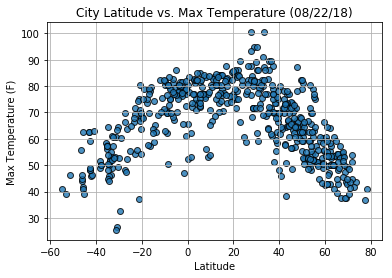

#### Latitude vs. Humidity Plot

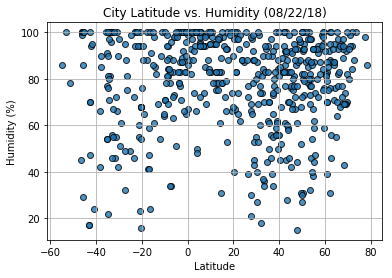

#### Latitude vs. Cloudiness Plot

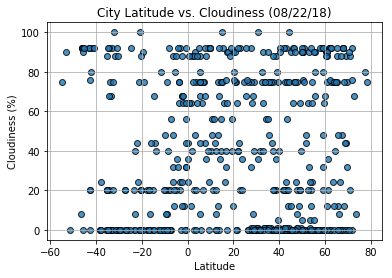

#### Latitude vs. Wind Speed Plot

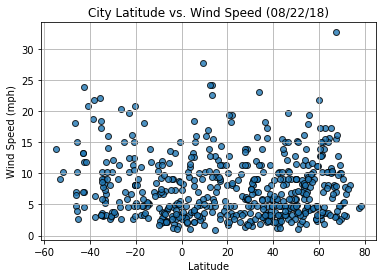